In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


# 기본 데이터 탐색


In [3]:
df.shape

(17998, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

## 결측치

In [5]:
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [6]:
df = df.dropna(subset=['claim_est_payout', 'age_of_vehicle']) 

In [7]:
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout             0
age_of_vehicle               0
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [8]:
# 0으로 충분히 해석할 수 있는 col은 0으로 변환
df['marital_status'].fillna(0.0, inplace=True)
df['witness_present_ind'].fillna(0.0, inplace=True)

In [9]:
df.isnull().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

## 클래스 불균형 확인

In [10]:
df['fraud'].value_counts()

0    15161
1     2812
Name: fraud, dtype: int64

In [11]:
# 15.6 %
df['fraud'].value_counts()[1] / df['fraud'].value_counts().sum() * 100

15.645690758359763

## 연속형/범주형 변수 탐색

In [12]:
# numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['gender', 'living_status', 'claim_date', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']
numeric_list : ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [13]:
df[numeric_list]

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
0,1,46,1.0,85,38301,1,1,80006,1,0.0,74,0,7530.940993,9.0,12885.452350,16161.33381,0
1,3,21,0.0,75,30445,0,1,15021,1,1.0,79,0,2966.024895,4.0,29429.452180,28691.96422,0
2,4,49,0.0,87,38923,0,1,20158,0,0.0,0,0,6283.888333,3.0,21701.181950,22090.94758,1
3,5,58,1.0,58,40605,1,0,15024,3,0.0,99,1,6169.747994,4.0,13198.273440,38329.58106,1
4,6,38,1.0,95,36380,1,0,50034,0,1.0,7,0,4541.387150,7.0,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,1.0,93,42338,1,0,15012,0,0.0,99,0,4806.841803,6.0,32144.571850,16868.53410,0
17994,29996,35,0.0,22,35579,1,1,20111,1,0.0,94,1,4089.794471,3.0,9468.510601,31500.99689,1
17995,29997,27,1.0,81,32953,0,1,15012,2,0.0,1,1,2225.803056,5.0,64974.369590,44536.25506,0
17996,29999,52,1.0,86,39519,1,0,15026,1,1.0,75,1,9560.744844,3.0,24983.268110,50093.75959,0


In [14]:
df[categoical_list]

,gender,living_status,claim_date,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,M,Rent,12/16/2016,Friday,Local,Broker,Compact,white
1,F,Rent,2/12/2015,Thursday,Highway,Online,Large,white
2,F,Own,12/6/2016,Tuesday,Local,Broker,Compact,white
3,F,Own,5/5/2016,Thursday,Local,Broker,Medium,other
4,M,Rent,10/27/2015,Tuesday,Highway,Broker,Medium,gray
...,...,...,...,...,...,...,...,...
17993,M,Own,3/28/2015,Saturday,Local,Broker,Medium,black
17994,F,Own,1/5/2015,Monday,Local,Phone,Medium,blue
17995,F,Rent,9/10/2016,Saturday,Local,Online,Medium,black
17996,F,Own,12/25/2015,Friday,Highway,Broker,Compact,white


### 연속형

- age_of_driver

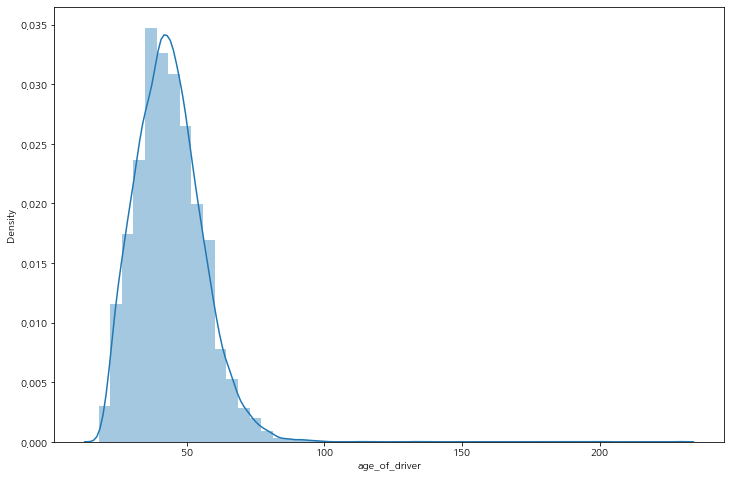

In [18]:
sns.distplot(df['age_of_driver'])
plt.gcf().set_size_inches(12, 8)
plt.show()

In [19]:
# 구간화
df['age_of_driver_gp'] = np.where (df['age_of_driver'] <= 30, 1, 
                           np.where(df['age_of_driver'] <= 50, 2, 3))

df[['age_of_driver','age_of_driver_gp']]

,age_of_driver,age_of_driver_gp
0,46,2
1,21,1
2,49,2
3,58,3
4,38,2
...,...,...
17993,69,3
17994,35,2
17995,27,1
17996,52,3


In [20]:
# 구간화에 따른 청구 사기율
num_val='age_of_driver_gp'

# ▶ 1단계
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# ▶ 2단계
df_pivot = pd.pivot_table(df_tran,               # 피벗할 데이터프레임
                      index = num_val,           # 행 위치에 들어갈 열
                      columns = 'fraud',         # 열 위치에 들어갈 열
                      values = 'claim_number')   # 데이터로 사용할 열 
# ▶ 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ 4단계
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,age_of_driver_gp,0,1,ratio
0,1,2047,378,15.6
1,2,8838,1981,18.3
2,3,4276,453,9.6


- annual_income

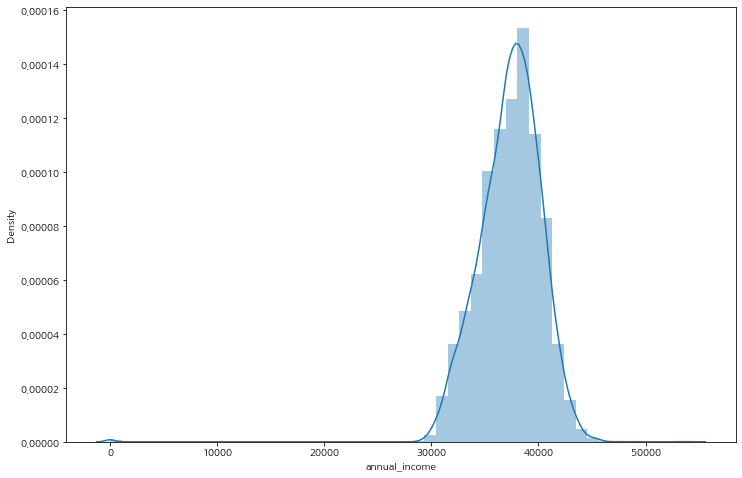

In [21]:
sns.distplot(df['annual_income'])
plt.gcf().set_size_inches(12, 8)
plt.show()

In [22]:
# 구간화
import numpy as np
df['annual_income_gp'] = np.where (df['annual_income'] <= 35000, 1, 
                           np.where(df['annual_income'] <= 40000, 2, 3))

df[['annual_income','annual_income_gp']]

,annual_income,annual_income_gp
0,38301,2
1,30445,1
2,38923,2
3,40605,3
4,36380,2
...,...,...
17993,42338,3
17994,35579,2
17995,32953,1
17996,39519,2


In [23]:
# 구간화에 따른 청구 사기율
cat_val='annual_income_gp'

# ▶ 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# ▶ 2단계
df_pivot = pd.pivot_table(df_tran,               # 피벗할 데이터프레임
                      index = cat_val,           # 행 위치에 들어갈 열
                      columns = 'fraud',         # 열 위치에 들어갈 열
                      values = 'claim_number')   # 데이터로 사용할 열 
# ▶ 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ 4단계
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,annual_income_gp,0,1,ratio
0,1,3134,592,15.9
1,2,9222,1911,17.2
2,3,2805,309,9.9


# 범주형